In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
347,15768151,Female,54,108000,1
99,15756820,Female,28,37000,0
375,15646091,Female,46,32000,1
244,15586996,Female,41,72000,0
368,15779744,Male,38,71000,0


In [4]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('Purchased', axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=123)

X_train.shape, X_test.shape

((320, 2), (80, 2))

### Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_train_scaled[:2]

array([[-1.26804041, -1.38388204],
       [ 0.96148119,  1.98801329]])

In [9]:
scaler.mean_

array([3.765000e+01, 6.855625e+04])

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,37.6,68556.2
std,10.8,32970.7
min,18.0,15000.0
25%,29.0,43000.0
50%,37.0,68000.0
75%,46.0,86000.0
max,60.0,150000.0


In [12]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.8,-1.6
25%,-0.8,-0.8
50%,-0.1,-0.0
75%,0.8,0.5
max,2.1,2.5


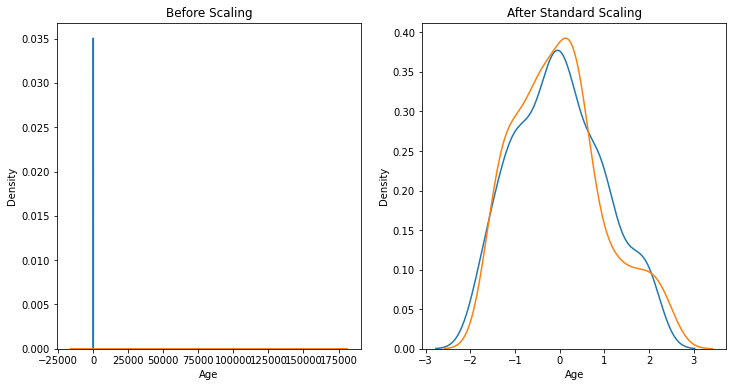

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()